# Quantum walk on 2D lattice

In [14]:
import qiskit as qk

# target machine
sim = qk.Aer.get_backend('qasm_simulator')

# numer of qubits for each cordinate
# size of the walk in qubits in qdim+qdim
qdim = 5

# number of steps
steps = 2**(qdim-2)

# numer of simulations
shots = 1000

print('Number of qubits:', qdim+qdim)
print('Number of steps:', steps)
print('Number of simulations:', shots)

Number of qubits: 10
Number of steps: 8
Number of simulations: 1000


## Operators used in arXiv:0706.0304

In [15]:
def increment(qc, qr, dim):
    for i in range(dim):
        qc.mct(qr[0:dim - i], qr[dim - i], None, mode='noancilla')
        
def decrement(qc, qr, dim):
    for i in range(dim):
        qc.x(qr[0:dim - i])
        qc.mct(qr[0:dim - i], qr[dim - i], None, mode='noancilla')
        qc.x(qr[0:dim - i])

## Allocate registers

In [16]:
# allocate main registers using (x,y) coordinats
# for choosing the directions
x_qcoin = qk.QuantumRegister(1, name='c-x')
y_qcoin = qk.QuantumRegister(1, name='c-y')

x_qr = qk.QuantumRegister(qdim, name='q-x')
y_qr = qk.QuantumRegister(qdim, name='q-y')

x_cr = qk.ClassicalRegister(qdim, name='x')
y_cr = qk.ClassicalRegister(qdim, name='y')

qc = qk.QuantumCircuit()

# add registers to the circuit
qc.add_register(x_qcoin)
qc.add_register(y_qcoin)

qc.add_register(x_qr)
qc.add_register(y_qr)

qc.add_register(x_cr)
qc.add_register(y_cr)

## Initialize the coin

In [18]:
# initial state of the coins is entangled
# qc.h(x_qcoin)
# qc.cx(x_qcoin, y_qcoin)


# initial state of the coins is entangled
qc.h(x_qcoin)
qc.s(x_qcoin)

qc.h(y_qcoin)
qc.s(y_qcoin)

# qc.barrier()

## Main loop

In [19]:
# quantum circuit implementing a quantum walk along a 2D hypercycle from arXiv:0706.0304

# chose on which qubits to act during each step
x_qubits = [qc.qubits[0]] + qc.qubits[2:2+qdim]
y_qubits = [qc.qubits[1]] + qc.qubits[2+qdim:2+qdim+qdim]

for _ in range(steps):
    qc.h(x_qcoin)
    qc.h(y_qcoin)

    increment(qc, x_qubits, qdim)
    decrement(qc, x_qubits, qdim)
   
    increment(qc, y_qubits, qdim)
    decrement(qc, y_qubits, qdim)

## Final measurement

In [20]:
# ignore the coin (qc.qubits[0]) register
qc.measure(x_qr, x_cr);
# qc.barrier()
qc.measure(y_qr, y_cr);

In [21]:
# makes sense only for small circuits
# qc.draw(output='mpl')

In [22]:
# NOTE: results of y_qr measurement 
job = qk.execute(qc, sim, shots=shots)
counts = job.result().get_counts(qc)

In [23]:
# counts

# qk.visualization.plot_histogram(counts)

## Convert to matrix form for some visualization

In [24]:
data = np.zeros((2**qdim,2**qdim))

for k in counts.keys():
    [i,j] = map(lambda x:int(x,2), k.split(' '))
    data[i,j] = counts[k]/shots

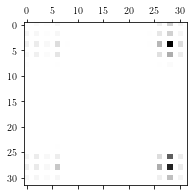

In [25]:
from IPython.core.display import display

import numpy as np
import matplotlib as mpl

mpl.rc('text', usetex = True)
mpl.rc('font', size = 10)

fig = mpl.figure.Figure(figsize=(3,3))
axs = fig.add_subplot()
axs.matshow(data, cmap=plt.cm.Greys)
display(fig)

In [13]:
# fig.savefig("quantum-walk-2D-lattice-ent.pdf")

In [26]:
fig.savefig("quantum-walk-2D-lattice-sep.pdf")